## 线性回归

In [9]:
import numpy as np
import pandas as pd

In [10]:
### 初始化模型参数
def initialize_params(dims):
    '''
    输入：
    dims：训练数据变量维度
    输出：
    w：初始化权重参数值
    b：初始化偏差参数值
    '''
    # 初始化权重参数为零矩阵
    w = np.zeros((dims, 1))
    # 初始化偏差参数为零
    b = 0
    return w, b

In [11]:
### 定义模型主体部分
### 包括线性回归公式、均方损失和参数偏导三部分
def linear_loss(X, y, w, b):
    '''
    输入:
    X：输入变量矩阵
    y：输出标签向量
    w：变量参数权重矩阵
    b：偏差项
    输出：
    y_hat：线性模型预测输出
    loss：均方损失值
    dw：权重参数一阶偏导
    db：偏差项一阶偏导
    '''
    # 训练样本数量
    num_train = X.shape[0]
    # 训练特征数量
    num_feature = X.shape[1]
    # 线性回归预测输出
    y_hat = np.dot(X, w) + b
    # 计算预测输出与实际标签之间的均方损失
    loss = np.sum((y_hat-y)**2)/num_train
    # 基于均方损失对权重参数的一阶偏导数
    dw = np.dot(X.T, (y_hat-y)) /num_train
    # 基于均方损失对偏差项的一阶偏导数
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [12]:
### 定义线性回归模型训练过程
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签向量
    learning_rate：学习率
    epochs：训练迭代次数
    输出：
    loss_his：每次迭代的均方损失
    params：优化后的参数字典
    grads：优化后的参数梯度字典
    '''
    # 记录训练损失的空列表
    loss_his = []
    # 初始化模型参数
    w, b = initialize_params(X.shape[1])
    # 迭代训练
    for i in range(1, epochs):
        # 计算当前迭代的预测值、损失和梯度
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 基于梯度下降的参数更新
        w += -learning_rate * dw
        b += -learning_rate * db
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每1000次迭代打印当前损失信息
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
        # 将当前迭代步优化后的参数保存到字典
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典
        grads = {
            'dw': dw,
            'db': db
        }     
    return loss_his, params, grads

In [13]:
X = np.ones(shape=(353,10))
X.shape

(353, 10)

In [14]:
w, b = initialize_params(X.shape[1])
w.shape

(10, 1)

In [15]:
y=np.ones(shape=(353,))
y.shape

(353,)

In [16]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [17]:
# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle
# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [18]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3679.868273
epoch 20000 loss 3219.164522
epoch 30000 loss 3040.820279
epoch 40000 loss 2944.936608
epoch 50000 loss 2885.991571
epoch 60000 loss 2848.051813
epoch 70000 loss 2823.157085
epoch 80000 loss 2806.627821
epoch 90000 loss 2795.546917
epoch 100000 loss 2788.051561
epoch 110000 loss 2782.935842
epoch 120000 loss 2779.411265
epoch 130000 loss 2776.957989
epoch 140000 loss 2775.230803
epoch 150000 loss 2773.998942
epoch 160000 loss 2773.107192
epoch 170000 loss 2772.450534
epoch 180000 loss 2771.957489
epoch 190000 loss 2771.579121
{'w': array([[  10.56390075],
       [-236.41625133],
       [ 481.50915635],
       [ 294.47043558],
       [ -60.99362023],
       [-110.54181897],
       [-206.44046579],
       [ 163.23511378],
       [ 409.28971463],
       [  65.73254667]]), 'b': 150.8144748910088}


In [19]:
### 定义线性回归预测函数
def predict(X, params):
    '''
    输入：
    X：测试数据集
    params：模型训练参数
    输出：
    y_pred：模型预测结果
    '''
    # 获取模型参数
    w = params['w']
    b = params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
y_pred[:5]

array([[ 82.0537503 ],
       [167.22420149],
       [112.38335719],
       [138.15504748],
       [174.71840809]])

In [20]:
print(y_test[:5])

[[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


In [21]:
### 定义R2系数函数
def r2_score(y_test, y_pred):
    '''
    输入：
    y_test：测试集标签值
    y_pred：测试集预测值
    输出：
    r2：R2系数
    '''
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [22]:
print(r2_score(y_test, y_pred))

0.5334188457463577


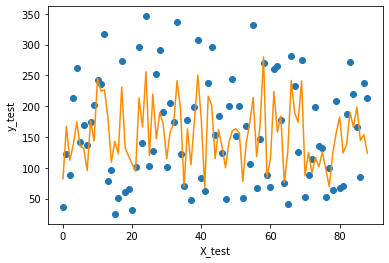

In [23]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

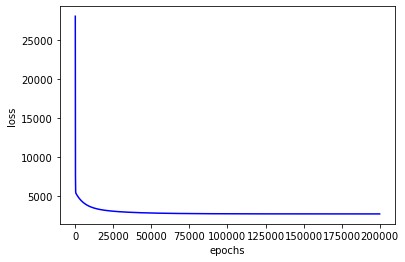

In [24]:
plt.plot(loss_his, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [25]:
from sklearn.utils import shuffle
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
data = np.concatenate((X, y.reshape((-1,1))), axis=1)
data.shape

(442, 11)

In [27]:
from random import shuffle

def k_fold_cross_validation(items, k, randomize=True):
    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        training = np.array(training)
        validation = np.array(validation)
        yield training, validation


for training, validation in k_fold_cross_validation(data, 5): 
    X_train = training[:, :10]
    y_train = training[:, -1].reshape((-1,1))
    X_valid = validation[:, :10]
    y_valid = validation[:, -1].reshape((-1,1))
    loss5 = []
    #print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
    loss, params, grads = linear_train(X_train, y_train, 0.001, 100000)
    loss5.append(loss)
    score = np.mean(loss5)
    print('five kold cross validation score is', score)
    y_pred = predict(X_valid, params)
    valid_score = np.sum(((y_pred-y_valid)**2))/len(X_valid)
    print('valid score is', valid_score)

epoch 10000 loss 5691.020878
epoch 20000 loss 5348.335014
epoch 30000 loss 5057.483172
epoch 40000 loss 4809.887762
epoch 50000 loss 4598.431321
epoch 60000 loss 4417.205780
epoch 70000 loss 4261.304941
epoch 80000 loss 4126.652666
epoch 90000 loss 4009.860637
five kold cross validation score is 4846.591085182258
valid score is 3778.803258768074
epoch 10000 loss 5282.139068
epoch 20000 loss 5012.692214
epoch 30000 loss 4780.800660
epoch 40000 loss 4580.708131
epoch 50000 loss 4407.569874
epoch 60000 loss 4257.306699
epoch 70000 loss 4126.482511
epoch 80000 loss 4012.201515
epoch 90000 loss 3912.021932
five kold cross validation score is 4622.954950545252
valid score is 4753.46891405462
epoch 10000 loss 5640.394829
epoch 20000 loss 5305.537053
epoch 30000 loss 5020.762639
epoch 40000 loss 4777.971744
epoch 50000 loss 4570.405124
epoch 60000 loss 4392.420727
epoch 70000 loss 4239.307624
epoch 80000 loss 4107.131004
epoch 90000 loss 3992.603032
five kold cross validation score is 4810.225

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
y = y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353, 1) (89, 10) (89, 1)


Coefficients: 
 [[ -23.510529 -216.31224   472.36664   372.07184  -863.6953    583.27313
   105.79194   194.76958   754.0722     38.22219 ]]
Mean squared error: 3028.50
Variance score: 0.53
0.5298198665264144


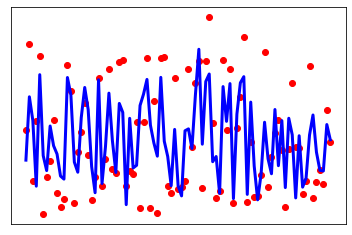

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(range(X_test.shape[0]), y_test, color='red')
plt.plot(range(X_test.shape[0]), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show();

In [30]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

### 交叉验证
def cross_validate(model, x, y, folds=5, repeats=5):
    
    ypred = np.zeros((len(y),repeats))
    score = np.zeros(repeats)
    for r in range(repeats):
        i=0
        print('Cross Validating - Run', str(r + 1), 'out of', str(repeats))
        x,y = shuffle(x, y, random_state=r) #shuffle data before each repeat
        kf = KFold(n_splits=folds,random_state=i+1000) #random split, different each time
        for train_ind, test_ind in kf.split(x):
            print('Fold', i+1, 'out of', folds)
            xtrain,ytrain = x[train_ind,:],y[train_ind]
            xtest,ytest = x[test_ind,:],y[test_ind]
            model.fit(xtrain, ytrain)
            #print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
            ypred[test_ind]=model.predict(xtest)
            i+=1
        score[r] = R2(ypred[:,r],y)
    print('\nOverall R2:',str(score))
    print('Mean:',str(np.mean(score)))
    print('Deviation:',str(np.std(score)))
    pass

cross_validate(regr, X, y, folds=5, repeats=5)

Cross Validating - Run 1 out of 5


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.